<a href="https://colab.research.google.com/github/aditi2259/Anonymous/blob/main/Alzeimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [18]:
csv_path = "/content/alzheimers_dataset/alzheimers_disease_data.csv"
data = pd.read_csv(csv_path)

In [19]:
X = data.drop(columns=['PatientID', 'Diagnosis', 'DoctorInCharge'])
y = data['Diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Minimal epochs for quick training
    batch_size=32
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6301 - loss: 0.6777 - val_accuracy: 0.7744 - val_loss: 0.5227
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7416 - loss: 0.5518 - val_accuracy: 0.8070 - val_loss: 0.4645
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4617 - val_accuracy: 0.8116 - val_loss: 0.4315
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 0.4631 - val_accuracy: 0.8163 - val_loss: 0.4116
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8126 - loss: 0.4006 - val_accuracy: 0.8209 - val_loss: 0.4039
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3542 - val_accuracy: 0.8186 - val_loss: 0.4009
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.3848 - val_accuracy: 0.8256 - val_loss: 0.3947
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.3660 - val_accuracy: 0.8302 - val_loss:

In [22]:
y_pred = model.predict(X_val).argmax(axis=1)

print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_.astype(str)))

print("Accuracy:", accuracy_score(y_val, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       277
           1       0.82      0.67      0.74       153

    accuracy                           0.83       430
   macro avg       0.83      0.79      0.81       430
weighted avg       0.83      0.83      0.83       430

Accuracy: 0.8302325581395349


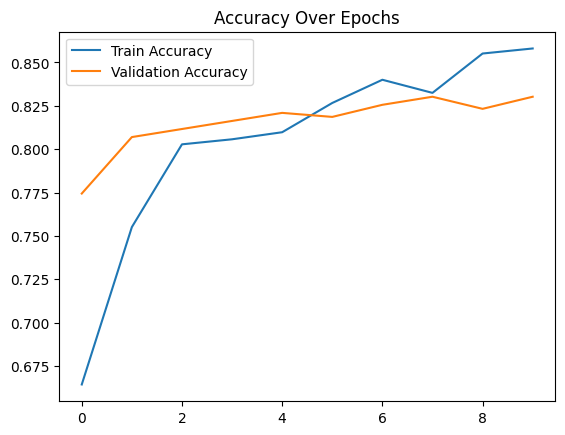

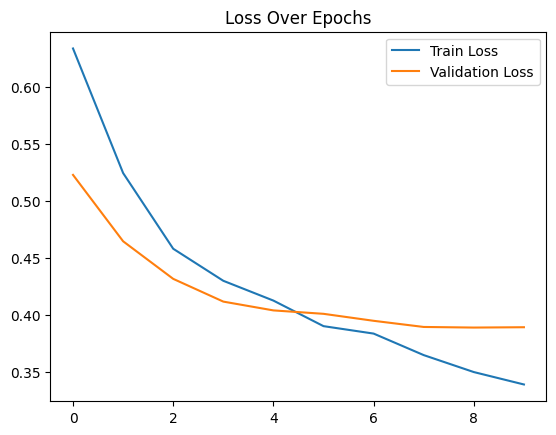

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()